# Opentrons Mass Balance Automation 

## Aniket Chitre

### 0. Import Packages

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import serial
import csv

In [4]:
start_t = time.time()

time.sleep(5)

time_elapsed = time.time() - start_t
print(time_elapsed)

5.00465202331543


### 1. Port for Mass Balance

Find the port number on Windows through Device Manager or on Mac through running this command (`ls /dev/tty.*`) on the Terminal

In [2]:
#port = '/dev/tty.usbserial-14130'
port = 'COM5'

### 2. Function to Read Mass from Balance

In [3]:
def get_mass(port):
    try:
        balance = serial.Serial(port, 9600, xonxoff=True) # check COM port and xonxoff (handshake) = True default for MT balance
        balance.write('S\r\n'.encode('utf-8'))
        time.sleep(1)
        result  = balance.read_until('\r\n'.encode('utf-8'))
        value = str(result[7:14].decode("utf-8"))
        #balance.close()
        if (value.strip() != '-------') and (value.strip() != ''):
            return (True,float(value))
        return (False,-1)
    except:
        return (False,-1)

### 3. Real-time Data

In [4]:
x = [] #store time here 
mass = [] #store mass here
i = 0

while True:
    x.append(i*2)
    
    status, val = get_mass(port)
    if status == True:
        curr_val = val
    else:
        curr_val = mass[-1]
        
    print(curr_val)
    mass.append(curr_val)
    
    time.sleep(1)
    i += 1

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.001
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.001
-0.001
-0.002
-0.002
-0.002
0.0
-0.002
-0.002
-0.002
0.975
0.979
0.979
0.977
0.978
1.982
1.982
1.981
1.982
2.959
2.963
2.963
2.962
2.962
3.965
3.97
3.97
3.968
3.968
4.968
4.972
4.972
4.971
4.972
5.977
5.977
5.975
5.976
6.769
6.773
6.773
6.772
6.772
6.772
7.568
7.568
7.568
7.569
7.569
8.571
8.571
8.571
8.571
9.569
9.575
9.575
9.574
9.574
10.574
10.578
10.578
10.577
10.577
11.578
11.582
11.582
11.581
11.581
12.581
12.585
12.585
12.584
12.583
13.585
13.587
13.589
13.588
13.587
14.147
14.148
14.15
14.15
14.149
14.715
14.715
14.718
14.718
15.72
15.719
15.718
15.718
16.723
16.723
16.723
16.724
17.724
17.728
17.728
17.728
17.728
18.731
18.731
18.731
18.731
19.734
19.734
19.733
19.735
20.708
20.712
20.712
20.71
20.711
21.522
21.522
21.521
21.521
22.332
22.332
22.331
22.331
23.336
23.335
23.334
23.333
24.339
24.339
24.337
24.337
25.341
25.341
25.339
25.339
26.343
26.343
26.34
26.341
27.346
27.345
27.344
27

57.442
57.442
57.442
57.442
57.442
57.442
57.442
57.441
57.44
57.44
57.44
57.44
57.44
57.44
57.44
57.439
57.437
57.437
57.437
57.437
57.437
57.437
57.438
57.438
57.438
57.438
57.438
57.437
57.437
57.437
57.438
57.436
57.436
57.435
57.435
57.471
57.743
57.743
57.772
57.772
57.772
57.772
57.772
57.806
57.806
57.805
57.805
57.804
57.803
57.803
57.803
57.803
57.803
57.802
57.802
57.802
57.801
57.801
57.801
57.801
57.801
57.801
57.801
57.801
57.8
57.8
57.8
57.8
57.8
57.8
57.799
57.799
57.799
57.798
57.798
57.798
57.799
57.798
57.798
57.798
57.979
57.979
57.979
57.979
57.978
57.979
57.979
57.978
57.978
57.978
57.976
57.976
57.976
57.976
57.976
57.976
57.976
57.976
57.976
57.976
57.975
57.974
57.974
57.974
57.974
57.974
57.973
57.973
57.973
57.973
57.973
57.973
57.973
57.973
57.972
57.971
57.971
57.972
57.971
57.971
57.97
57.97
58.021
58.064
58.064
58.064
58.104
58.103
58.103
58.103
58.102
58.102
58.102
58.102
58.101
58.098
58.102
58.102
58.102
58.101
58.1
58.098
58.099
58.099
58.101
58.101
5

KeyboardInterrupt: 

In [5]:
results = {'Time': x, 'Mass': mass}

### 4. Plotting and Exporting Data

In [6]:
mass_df = pd.DataFrame(results)
mass_df

,Time,Mass
0,0,0.000
1,2,0.000
2,4,0.000
3,6,0.000
4,8,0.000
...,...,...
1413,2826,59.680
1414,2828,59.681
1415,2830,59.681
1416,2832,59.681


<IPython.core.display.Javascript object>


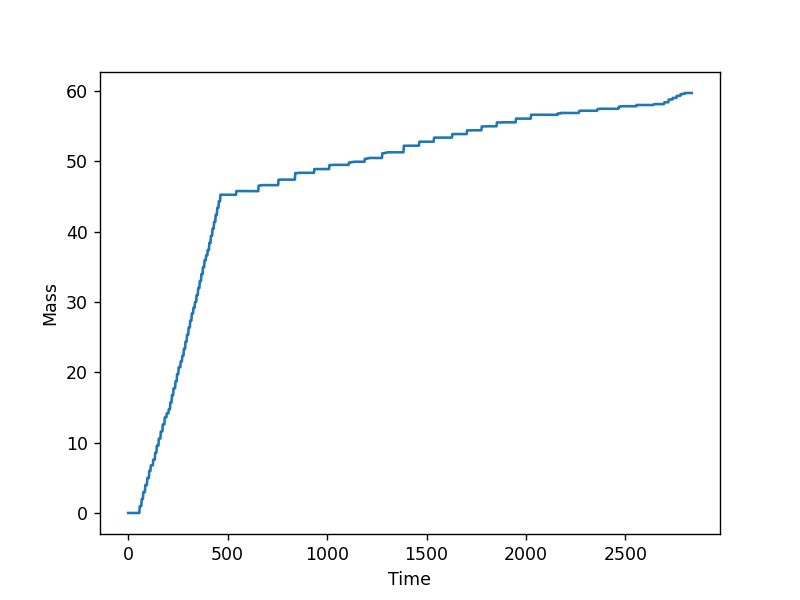

In [7]:
sns.lineplot(x='Time', y='Mass', data=mass_df);

In [8]:
mass_df.to_csv('mass_data/MassProfile_230523_S517-522.csv')